<a href="https://colab.research.google.com/github/GboyeStack-Robotics-ML-Engineer/Deep-Learning/blob/main/ENCODER_DECODER_ARCHITECTURE_WITH_TRANSFER_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
model = tf.keras.applications.MobileNet(
    input_shape=None,
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

base_model =tf. keras.applications.Xception(
    weights='imagenet',
    input_shape=(150, 150, 3),
    include_top=False)

base_model.trainable = False

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
training_set = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=32,
                                             image_size=(224, 224))
val_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=32,
                                                  image_size=(224, 224))

NameError: ignored

In [ ]:
import os
from google.colab import drive
MOUNTPOINT = "/content/gdrive"
DATADIR = os.path.join(MOUNTPOINT, "MyDrive")
drive.mount(MOUNTPOINT)

weight_checkpoint_path = DATADIR + "/encoder_decoder_model/checkpoints/cp-epoch-{epoch}.ckpt"
model_checkpoint_path = DATADIR + "/encoder_decoder_model/encoder_decoder_best_model/checkpoints/Best_Encoder_Decoder"
Model_callback = tf.keras.callbacks.ModelCheckpoint(filepath=model_checkpoint_path,save_best_only=True,monitor="val_accuracy",mode="max",verbose=1,save_weights_only=True)

weight_callback = tf.keras.callbacks.ModelCheckpoint(filepath=weight_checkpoint_path,save_weights_only=True,monitor="val_accuracy",mode="max",verbose=1,save_best_only=True)

restore_model_dir=DATADIR + "/encoder_decoder_model/encoder_decoder_architecture_state_saver"

early_stopping=tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

if not os.path.exists(weight_checkpoint_path):

  os.makedirs(weight_checkpoint_path)

if not os.path.exists(model_checkpoint_path):

  os.makedirs(model_checkpoint_path)

if not os.path.exists(restore_model_dir):

  os.makedirs(restore_model_dir)

restore_model_callback=  tf.keras.callbacks.BackupAndRestore(
      # The path where your backups will be saved. Make sure the
      # directory exists prior to invoking `fit`.
      restore_model_dir,

      save_freq="epoch")

      #delete_checkpoint=True,
   # )

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#visualkeras.layered_view(model, legend=True) # without custom font
!pip install visualkeras
from PIL import ImageFont
import visualkeras
#font = ImageFont.truetype("arial.ttf")

def visualize_model(model):
  font = ImageFont.load_default()
  visualkeras.layered_view(model, legend=True, font=font,draw_volume=True) # selected font
visualize_model(model)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 17.0 MB/s eta 0:00:00


GETTING MY HANDS DIRTY WITH ENCODER DECODER ARCHITECTURE

In [ ]:
 !wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /content/catsdogs.zip

--2023-06-21 18:19:24--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.128, 172.217.214.128, 172.217.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/catsdogs.zip’

/content/catsdogs.z 100%[===================>]  65.43M   210MB/s    in 0.3s    

2023-06-21 18:19:24 (210 MB/s) - ‘/content/catsdogs.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile
with zipfile.ZipFile('catsdogs.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')
base_dir = '/content/cats_and_dogs_filtered/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagenerator=ImageDataGenerator(rescale=1/255)
test_datagenerator=ImageDataGenerator(rescale=1/255)

train_set=train_datagenerator.flow_from_directory(train_dir,target_size=(224,224),batch_size=32,class_mode='input')
test_set=train_datagenerator.flow_from_directory(validation_dir,target_size=(224,224),batch_size=32,class_mode='input')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
count=0
for image  in train_set.next():
  if count<2:
     print(image.shape)
  else:
    break



(32, 224, 224, 3)
(32, 224, 224, 3)


In [ ]:
data_augmentation = keras.Sequential(
    [       keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
   keras.layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

(32, 224, 224, 3)


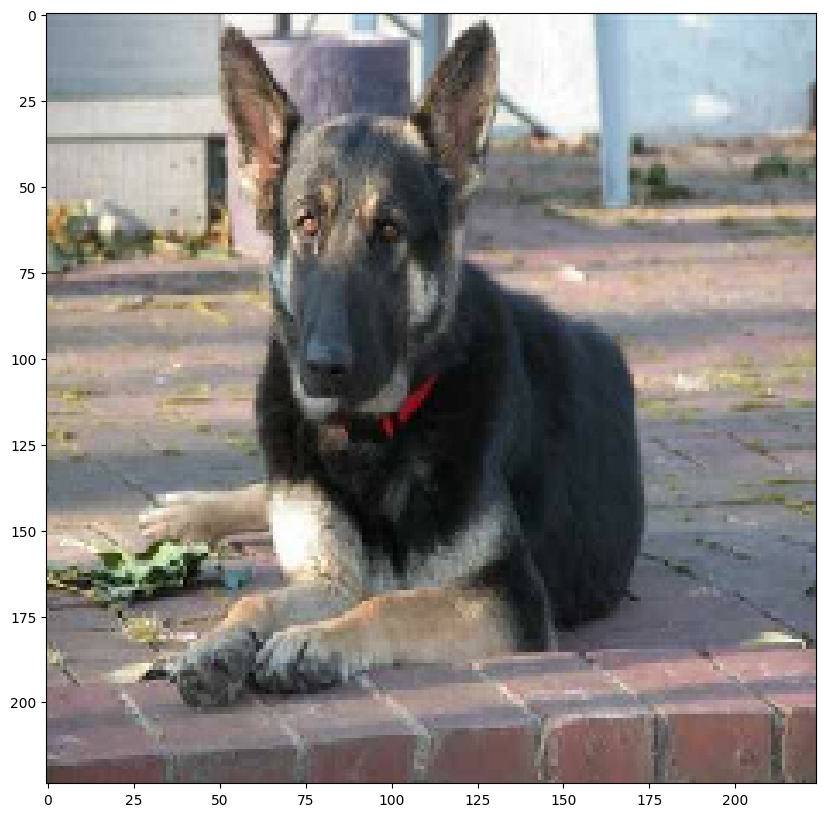

(32, 224, 224, 3)


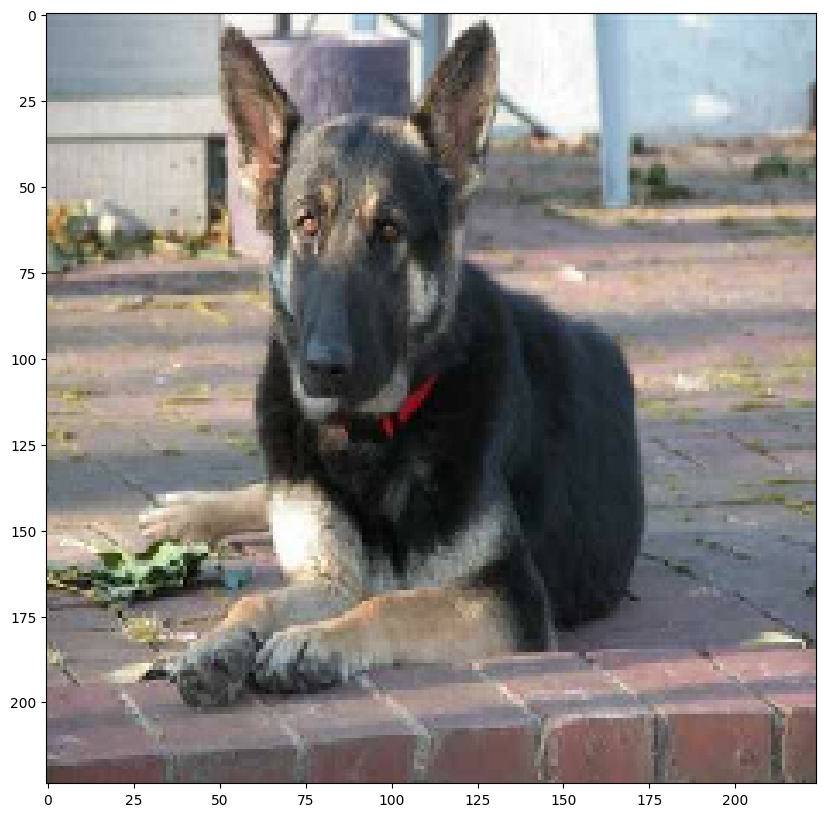

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
for images  in train_set.next():
    plt.figure(figsize=(10, 10))
    print(images.shape)
    first_image = images[:3,:,:,:]

    for image in first_image:
      plt.imshow(image,cmap='gray')
    plt.show()


In [ ]:
base_model = tf.keras.applications.vgg16.VGG16()

base_model.trainable=False


553467096/553467096 [==============================] - 8s 0us/step


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model_path=model_checkpoint_path

if os.path.exists(model_path):
  try:
    model_=tf.keras.models.load_model(model_path,compile=False)
  except:
    pass
  else:
    model_clone=tf.keras.models.clone_model(model_)
    model_clone.set_weights(model_.get_weights())
    model_clone.compile(optimizer='adam',loss='mse' ,metrics=['accuracy'])
    model=model_clone



else:
  model=model


In [ ]:
import matplotlib.pyplot as plt
import PIL
import numpy as np
from google.colab import output
import time
import warnings
warnings.filterwarnings(action='ignore')
class DisplayCallback(tf.keras.callbacks.Callback):

  def __init__(self):

    self.__num_results=None

  def show_predictions(self):

    import matplotlib.pyplot as plt

    for image in test_set.next():

        fig=plt.figure(1,figsize=(10,10))

        image=image[1,:,:,:]

        predictions=(np.array(model.predict(np.array(image).reshape(1,224,224,3))).flatten()).reshape(224,224,3)

        plot_data=[image,image, predictions]

        titles=['Input Image','Expected outcome','Predicted outcome']

        count=1

        for pos in plot_data:

            ax=fig.add_subplot(1,3,count)

            ax.imshow(pos,cmap="gray")

            ax.set_title(titles[count-1])

            count+=1

    plt.show()

    output.clear(wait=True)






  def on_epoch_end(self, epoch, logs=None,num_results=1):

    self.__num_results=num_results

    print ('\nSample Prediction after epoch {}\n'.format(epoch+1))
    print('.....................................................')

    self.show_predictions()


callbacks=[DisplayCallback(),early_stopping,Model_callback,restore_model_callback]

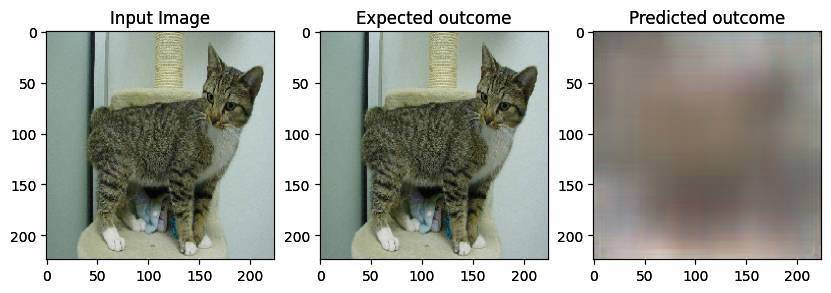


Epoch 33: val_accuracy did not improve from 0.64282

Epoch 33: val_accuracy did not improve from 0.64282
63/63 [==============================] - 18s 291ms/step - loss: 0.0473 - accuracy: 0.6143 - val_loss: 0.0483 - val_accuracy: 0.6208


In [ ]:

callbacks=[DisplayCallback(),early_stopping,weight_callback,Model_callback,restore_model_callback]

encoder=tf.keras.Sequential()

for index,layer in enumerate(base_model.layers):

  if index<=18:

    encoder.add(layer)


decoder=tf.keras.Sequential()

decoder.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same',input_shape=(7,7,512)))

decoder.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'))
decoder.add(tf.keras.layers.UpSampling2D((2,2)))

decoder.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'))
decoder.add(tf.keras.layers.UpSampling2D((2,2)))

decoder.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'))
decoder.add(tf.keras.layers.UpSampling2D((2,2)))

decoder.add(tf.keras.layers.Conv2D(16,(3,3),activation='relu',padding='same'))
decoder.add(tf.keras.layers.UpSampling2D((2,2)))

decoder.add(tf.keras.layers.Conv2D(3,(3,3),activation='relu',padding='same'))
decoder.add(tf.keras.layers.UpSampling2D((2,2)))

model=tf.keras.Sequential([data_augmentation,encoder,decoder])

model.compile(optimizer='Adam',loss='mse',metrics=['accuracy'])

history=model.fit(train_set,epochs=1000,batch_size=32,validation_data=test_set,callbacks=callbacks)

#model.summary()








<Axes: >

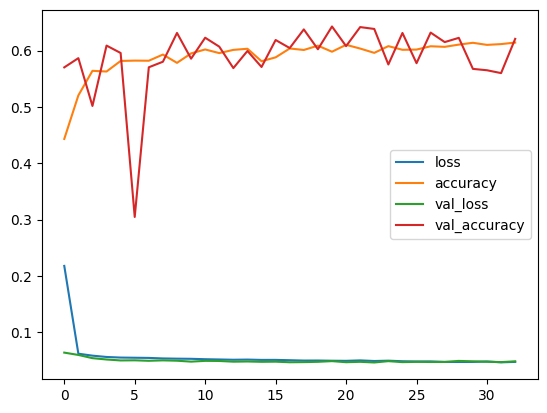

In [ ]:
import pandas as pd
history=pd.DataFrame(history.history)
history.plot()

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.2/492.2 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 8.3 MB/s eta 0:00:00
